# Link for the dataset: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python?resource=download

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Mall_Customers.csv")

# Exploratory Data Analysis

In [4]:
df.shape

(200, 5)

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [12]:
# Returns basic statistics on numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [13]:
# Returns true for a column having null values, else false
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

# Data Cleaning


In [ ]:
# Dropping the column of 'CustomerID' as it does not provide any value
df.drop('CustomerID', axis=1, inplace=True)

In [27]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

# Data Visualization

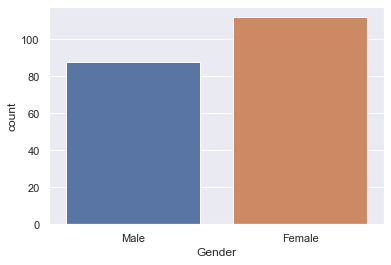

In [35]:
# Visualising the columns 'Gender' using Countplot
sns.set()
sns.countplot(x="Gender", data = df);

From the Count plot it is observed that the number of Female customers are more that the total number of Male customers.

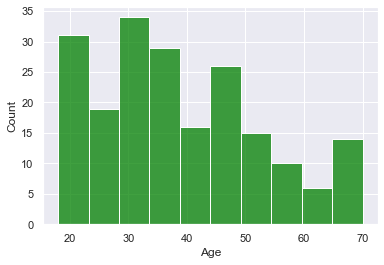

In [38]:
# Visualising the columns 'Age' using Histogram
sns.set()
sns.histplot(x="Age", bins=10, data=df, color="green");

From the Histogram it is evident that there are 3 age groups that are more frequently shop at the mall, they are: 15-22 years, 30-40 years and 45-50 years.

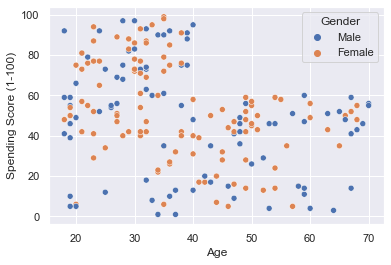

In [41]:
# Visualising the columns 'Age', 'Spending Score (1-100)' using Scatterplot
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Gender');

From the Age Vs Spending Score plot we observe that customers whose spending score is more than 65 have their Age in the range of 15-42 years. Also from the Scatter plot it is observed that customers whose spending score is more than 65 consists of more Females than Males.

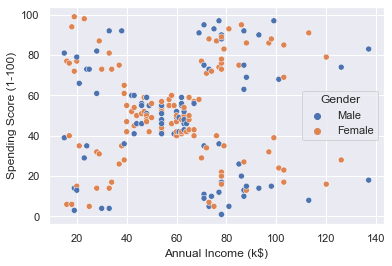

In [43]:
# Visualising the columns 'Annual Income (k$)', 'Spending Score (1-100)' using Scatterplot
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender');

From the Annual Income Vs Spending Score plot we observe that there are 5 clusters and can be categorised as:

a. High Income, High Spending Score (Top Right Cluster)

b. High Income, Low Spending Score (Bottom Right Cluster)

c. Average Income, Average Spending Score (Center Cluster)

d. Low Income, High Spending Score (Top Left Cluster)

e. Low Income, Low Spending Score (Bottom Left Cluster)

# Data Preprocessing

In [47]:
X = df.iloc[:, [2,3]]

In [48]:
X.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

# Finding optimal number of clusters for KMeans using Elbow Method

In [51]:
from sklearn.cluster import KMeans
# Calculating WCSS values for 1 to 10 clusters
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i, init="k-means++", random_state = 42)
    model.fit(X)
    wcss.append(model.inertia_)

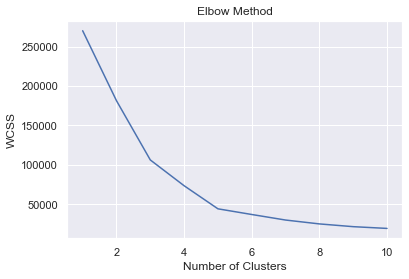

In [71]:
# Plotting the WCSS values
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the above plot it is observed that 5 clusters are optimal for the given dataset.

# Using the Dendograms to find the optimal number of clusters for HierarchicalClustering

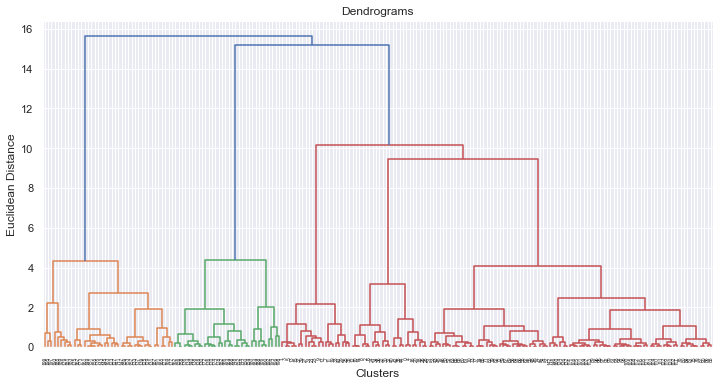

In [87]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(12, 6))
dendrograms = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrograms')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

From the above plot it is observed that 4-5 clusters are optimal for the given dataset.

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

Feature Scaling is performed because KMeans uses Distance (Euclidean, Manhattan, etc.) and the model perfoms faster on scaling the values.

# Model Building (KMeans and HierarchialClustering)

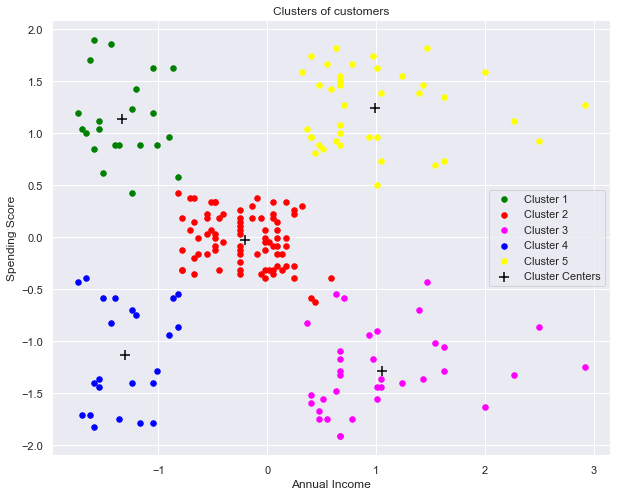

In [98]:
# Training the KMeans model with n_clusters=5
model = KMeans(n_clusters=5, init='k-means++', random_state=42)
y = model.fit_predict(X)

# Visualising the clusters
colors = ['green', 'red', 'magenta', 'blue', 'yellow']
plt.figure(figsize=(10, 8)) 

# Plot data points for each cluster
for cluster_id in range(5):
    plt.scatter(X[y == cluster_id, 0], 
                X[y == cluster_id, 1], 
                s=30, 
                c=colors[cluster_id], 
                label=f'Cluster {cluster_id+1}')

# Plot cluster centers
plt.scatter(x=model.cluster_centers_[:, 0], 
            y=model.cluster_centers_[:, 1], 
            s=100, 
            c='black', 
            marker='+', 
            label='Cluster Centers')

plt.legend()
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

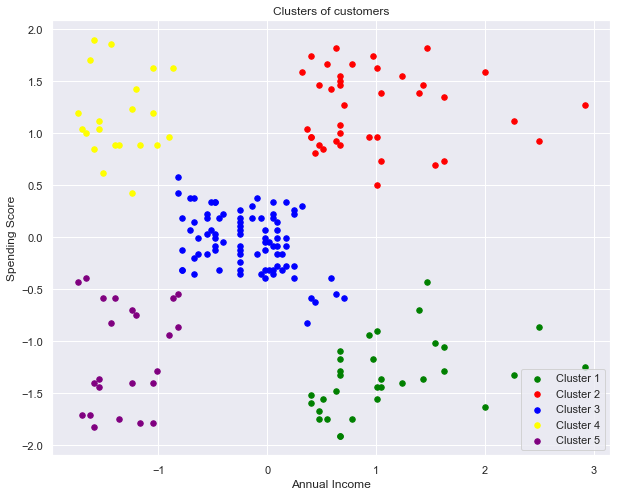

In [96]:
# Fitting Hierarchial clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage ='ward')
y_hc = hc.fit_predict(X)

# Visualizing another way
colors = ['green', 'red', 'blue', 'yellow', 'purple']
plt.figure(figsize=(10, 8))

# Get unique cluster labels
unique_labels = np.unique(y_hc)
for label in unique_labels:
    plt.scatter(X[y_hc == label, 0], 
                X[y_hc == label, 1], 
                s=30, 
                c=colors[label], 
                label=f'Cluster {label+1}')

plt.legend()
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# Final Words - Observation

a. High Income, High Spending Score (Cluster 5) - Target these customers by sending new product alerts which would lead to increase in the revenue collected by the mall as they are loyal customers.

b. High Income, Low Spending Score (Cluster 3) - Target these customers by asking the feedback and advertising the product in a better way to convert them into Cluster 5 customers.

c. Average Income, Average Spending Score (Cluster 2) - Can target these set of customers by providing them with Low cost EMI's etc.

d. Low Income, High Spending Score (Cluster 1) - May or may not target these group of customers based on the policy of the mall.

e. Low Income, Low Spending Score (Cluster 4) - Don't target these customers since they have less income and need to save money